In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras import optimizers
from keras import metrics
from keras import callbacks
from keras.callbacks import History
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.pipeline import Pipeline
import time

In [2]:
t0 = time.time()
df = pd.read_csv('lending-club-loan-data/df_modeling.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
t1 = time.time()
print('Cell Runtime: {}'.format(t1-t0))

Cell Runtime: 52.819119691848755


In [3]:
X = df.drop('loan_status',axis=1)
y = df['loan_status']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [38]:
ytrain_Xtrain=pd.concat([y_train, X_train], axis=1)
ytrain_Xtrain_sample = ytrain_Xtrain.sample(100000, random_state=42)
y_s = ytrain_Xtrain_sample['loan_status']
X_s = ytrain_Xtrain_sample.drop('loan_status',axis=1)

In [42]:
X_t_train, X_t_val, y_t_train, y_t_val = train_test_split(X_s, y_s, test_size=0.2)

In [43]:
y_t_train.value_counts()

0    71124
1     8876
Name: loan_status, dtype: int64

In [44]:
weight_for_0 = 1.0 / 71124
weight_for_1 = 1.0 / 8876

In [100]:
del model

In [237]:
model2 = models.Sequential([
        layers.Dense(256, activation="relu", input_dim=len(X_t_train.columns)),
        layers.Dropout(0.3),
        layers.Dense(64, activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(32, activation="relu"),
        layers.Dense(1, activation="sigmoid"),])

In [238]:
t0 = time.time()
metrics_list = [metrics.AUC(name="auc"),
                metrics.Recall(name="recall"),
                metrics.Precision(name="precision"),
                metrics.FalsePositives(name="fp"),
                metrics.TrueNegatives(name="tn"),
                metrics.TruePositives(name="tp"),
                metrics.FalseNegatives(name="fn"),
                metrics.Precision(name="precision")]

model2.compile(optimizer='adam', loss="binary_crossentropy", metrics=metrics_list)

class_weights = {0: weight_for_0, 1: weight_for_1}

history2 = model2.fit(
    X_t_train,
    y_t_train,
    batch_size=250,
    epochs=50,
    validation_data=(X_t_val, y_t_val),
    class_weight=class_weights)
t1 = time.time()
print('Cell Runtime: {}'.format(t1-t0))

Train on 80000 samples, validate on 20000 samples
Epoch 1/50
80000/80000 [==============================] - 7s 84us/step - loss: 8.8102e-05 - auc: 0.6244 - recall: 0.5502 - precision: 0.1643 - fp: 24837.0000 - tn: 46287.0000 - tp: 4884.0000 - fn: 3992.0000 - val_loss: 0.7539 - val_auc: 0.7036 - val_recall: 0.8056 - val_precision: 0.1609 - val_fp: 9441.0000 - val_tn: 8311.0000 - val_tp: 1811.0000 - val_fn: 437.0000
Epoch 2/50
80000/80000 [==============================] - 6s 74us/step - loss: 3.9309e-05 - auc: 0.6773 - recall: 0.7032 - precision: 0.1701 - fp: 30449.0000 - tn: 40675.0000 - tp: 6242.0000 - fn: 2634.0000 - val_loss: 1.8930 - val_auc: 0.6691 - val_recall: 0.6259 - val_precision: 0.1814 - val_fp: 6350.0000 - val_tn: 11402.0000 - val_tp: 1407.0000 - val_fn: 841.0000
Epoch 3/50
80000/80000 [==============================] - 6s 71us/step - loss: 2.5223e-05 - auc: 0.6952 - recall: 0.7139 - precision: 0.1735 - fp: 30193.0000 - tn: 40931.0000 - tp: 6337.0000 - fn: 2539.0000 - val_

In [147]:
val_metrics = model.evaluate(X_t_val, y_t_val, batch_size=250)

20000/20000 [==============================] - 0s 18us/step


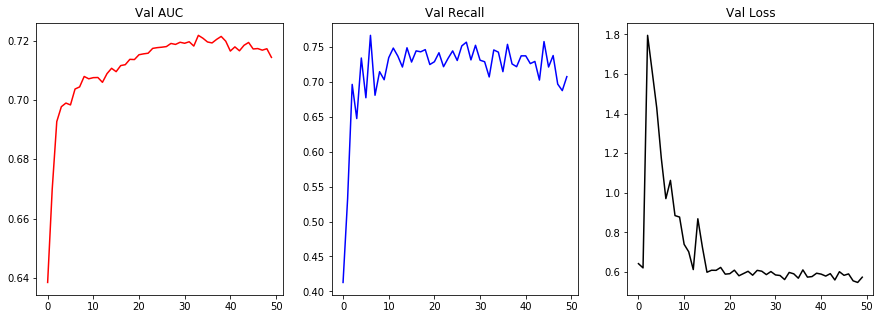

In [226]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
ax1.plot(history.history['val_auc'],c='red')
ax1.set_title('Val AUC')
ax2.plot(history.history['val_recall'],c='blue')
ax2.set_title('Val Recall')
ax3.plot(history.history['val_loss'],c='black')
ax3.set_title('Val Loss')
plt.show()

In [228]:
pred = model.predict_classes(X_t_val)
confusion_matrix(y_t_val, pred)

array([[10450,  7302],
       [  657,  1591]])

In [232]:
val_metrics = model1.evaluate(X_t_val, y_t_val, batch_size=250)

20000/20000 [==============================] - 1s 29us/step


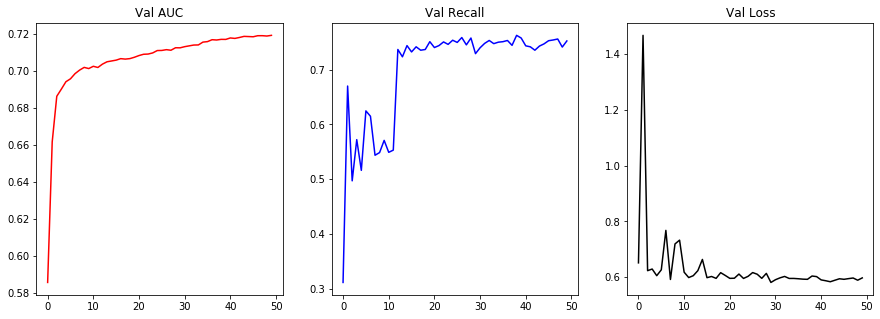

In [233]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
ax1.plot(history.history['val_auc'],c='red')
ax1.set_title('Val AUC')
ax2.plot(history.history['val_recall'],c='blue')
ax2.set_title('Val Recall')
ax3.plot(history.history['val_loss'],c='black')
ax3.set_title('Val Loss')
plt.show()

In [235]:
pred = model1.predict_classes(X_t_val)
confusion_matrix(y_t_val, pred)

array([[9705, 8047],
       [ 557, 1691]])

20000/20000 [==============================] - 0s 24us/step


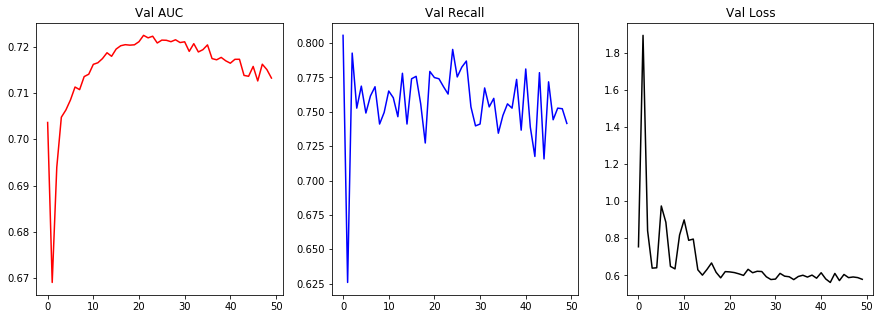

array([[9938, 7814],
       [ 581, 1667]])

In [242]:
val_metrics = model2.evaluate(X_t_val, y_t_val, batch_size=250)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
ax1.plot(history2.history['val_auc'],c='red')
ax1.set_title('Val AUC')
ax2.plot(history2.history['val_recall'],c='blue')
ax2.set_title('Val Recall')
ax3.plot(history2.history['val_loss'],c='black')
ax3.set_title('Val Loss')
plt.show()
pred = model2.predict_classes(X_t_val)
confusion_matrix(y_t_val, pred)

In [247]:
pred_flat = pred.flatten()

In [248]:
pred_flat.shape

(20000,)

In [255]:
df_confusion

col_0,0,1
loan_status,,
0,9938,7814
1,581,1667


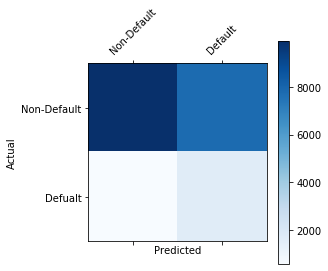

In [272]:
df_confusion = pd.crosstab(y_t_val, pred_flat)

def plot_conf_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, ['Non-Default','Default'], rotation=45)
    plt.yticks(tick_marks, ['Non-Default','Defualt'])
    #plt.tight_layout()
    plt.ylabel('Actual',rotation=90)
    plt.xlabel('Predicted')

plot_conf_matrix(df_confusion)